In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### data

In [2]:
#banana width = 4
#banana length = 8
#apple width =6
#apple length =6

N = 400
std = 0.5
bananas_width = np.random.normal(4, std, N)
bananas_length = np.random.normal(8, std, N)

apples_width = np.random.normal(6, std, N)
apples_length = np.random.normal(6, std, N)

width = np.concatenate((bananas_width, apples_width))
length = np.concatenate((bananas_length, apples_length))

X = np.array([width, length]).T

bananas_labels = np.zeros(N, dtype = 'int')
apples_labels = np.ones(N, dtype = 'int')

Y = np.concatenate((bananas_labels, apples_labels))

Text(0, 0.5, 'Length')

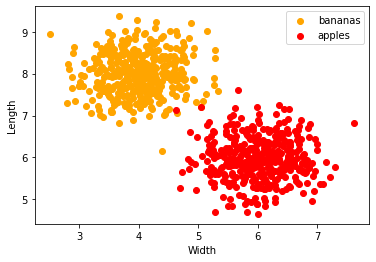

In [3]:
plt.scatter(X[0 : N, 0], X[0 : N , 1],  label='bananas', c='orange')
plt.scatter(X[N :, 0], X[N: , 1],  label='apples', c='red')

plt.legend()
plt.xlabel('Width')
plt.ylabel('Length')

### KNearestNeighbore classifier

In [10]:
class KNearestNeighbore():
    def __init__(self, k):
        self.k = k
    
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.number_classes = len(np.unique(y_train))
    
    def nearNeighbors(self, x_test):
        distance = np.sqrt(np.sum((x_test- self.X_train)**2, axis = 1))
        near_neighbors = np.argsort(distance)[:self.k]
        
        return near_neighbors
    
    def predict(self, x_test):
        near_neighbors = self.nearNeighbors(x_test)
        predict_label = np.argmax(np.bincount(self.y_train[near_neighbors]))
            
        return predict_label
    
    def evaluate(self, X_test, y_test):
        self.X_test = X_test
        self.Y_test = y_test
        y_pred = []     
        
        for i in range(len(X_test)):
            y_pred.append(self.predict(X_test[i]))
            
        true_label = np.count_nonzero(y_pred == y_test)
        accuracy = (true_label / len(y_pred))*100
        
        return accuracy

## test and train split

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### fit, predict and evaluating model

In [11]:
knn = KNearestNeighbore(3)
knn.fit(X_train, y_train)

accuracy = knn.evaluate(X_test, y_test)

print(accuracy)

99.375


### fit, predict and evaluating model using sklearn KNeighborsClassifier

In [15]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X, Y)

y_pred = classifier.predict(X_test)
accuracy = np.count_nonzero(y_pred == y_test) / len(y_test) * 100
print(accuracy)



99.375
